# PFRA 

### _Development Notebook_

__NOTE__ *Some settings are currently in place for PFRA Studies conducted by STARR II production studies. With time these will be transitioned to __general case options__.*

   - Assumes outputs written to zip files with '_out.zip' extensions
   - Assumes only one '.hdf' file in the out_zip
   - Assumes PFRA data structure with data stored on S3 with AWS credentials configured
   
   
--- 

### QA/QC
#### Global Errors Check

This notebook is intended to identify global issues in a model simulation that require follow-up responses from the modeler before the model can be used in *STARRII* PFRA studies.

Global issues currently implemented include:
 
 __1. Check Model inputs__
 
    A. Plan Information
    B. Plan Parameters
    C. Boundary Conditions 
     
__2. Check Results for each domain (2D Flow Area) in the model__
 
    A. Computational Summary & Depth Plots
    B. Domain Extents
    C. High Velocities at cell faces
 
 
Global issues *in development* include:
 - Mapping areas where Courant number exceeds indicated threshold.
 - Mapping areas where iteration counts exceed indicated threshold.


In [1]:
import sys;sys.path.append('../')
from hecrasio.core import ResultsZip
from hecrasio.qaqc import *

#### Read model output data 

*from AWS*




In [2]:
model_s3path = "s3://pfra/stantest/BaseModels/MeridianHills_P01.zip"
#model_s3path = "s3://pfra/data/ARLAMS.p01.zip"
model = ResultsZip(model_s3path, require_prj=False, pfra=False)

In [3]:
#assert len([f for f in model.contents if '.hdf' in f]) == 1, 'Check files...too many hdfs found'

In [4]:
hdfResults_paths = [f for f in model.contents if '.hdf' in f]
#hdfResults_paths

In [5]:
hdfResults_path = hdfResults_paths[3]
#hdfResults_path = hdfResults_paths[0]
rasPlan = HDFResultsFile(model, hdfResults_path)


### 1A. Plan Information

   

In [6]:
rasPlan.Plan_Information

,Results
Base Output Interval,1HOUR
Computation Time Step Base,1MIN
Flow Filename,P01.u01
Flow Title,P01_UnsteadyFlowData
Geometry Filename,P01.g03
Geometry Title,P01_updated
Plan Filename,P01.p01
Plan Name,Plan 01
Plan ShortID,Plan 01
Plan Title,Plan 01


### 1B. Plan Parameters


In [7]:
rasPlan.Plan_Parameters

,Results
1D Cores,0
1D Methodology,Finite Difference
1D2D Flow Tolerance,0.1
1D2D MaxIter,0
1D2D Minimum Flow Tolerance,1
1D2D WS Tolerance,0.01
2D Boundary Condition Ramp Up Fraction,[0.1]
2D Boundary Condition Volume Check,[b'False']
2D Cores,0
2D Coriolis,False


### 1C. Boundary Conditions 

#### Input hydrographs

* Need to update notebook for multiple domains

"Unable to open object (object 'Stage Hydrographs' doesn't exist)"
"Unable to open object (object 'Flow Hydrographs' doesn't exist)"


C:\Users\slawler\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
C:\Users\slawler\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


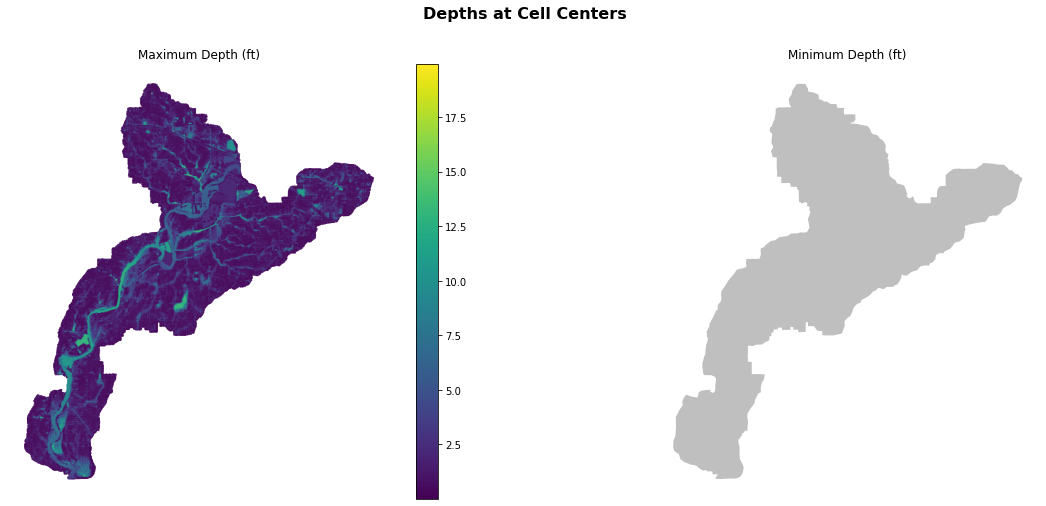

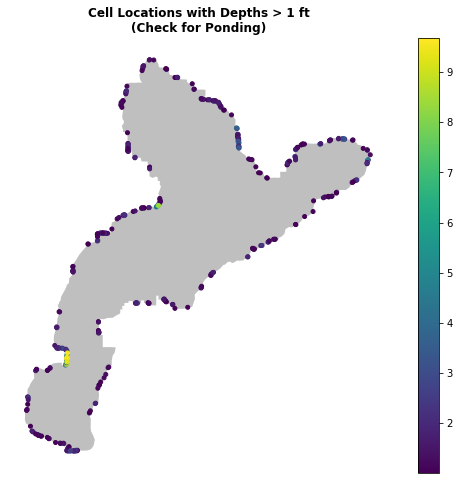

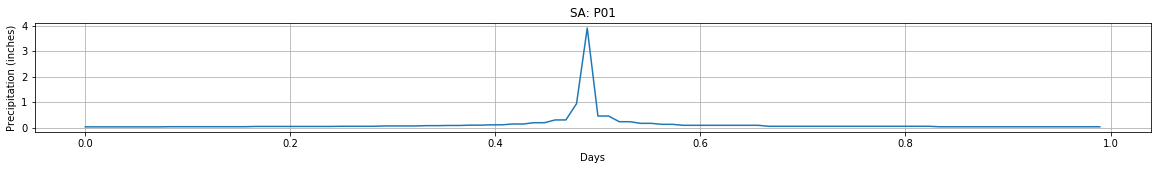

In [8]:
for domainID in rasPlan.domains:
    results = DomainResults(model, rasPlan, domainID)
    plot_descriptive_stats(results.Describe_Depths, results.Perimeter)
    plot_extreme_edges(results.Extreme_Edges, results.Perimeter)
    
plotBCs(results)

### 2A. Computational Summary



In [9]:
rasPlan.summary

,Results
Computation Time DSS,00:00:00
Computation Time Total,00:10:52
Maximum WSEL Error,0
Run Time Window,12JUN2019 12:43:29 to 12JUN2019 12:54:20
Solution,Unsteady Finished Successfully
Time Solution Went Unstable,NaN
Time Stamp Solution Went Unstable,Not Applicable
Vol Accounting,Volume Accounting in Acre Feet
Vol Accounting 2D Bdry,0
Vol Accounting Cell End,11963.8


Domain ID: P01, Average Cell Size = 100.0


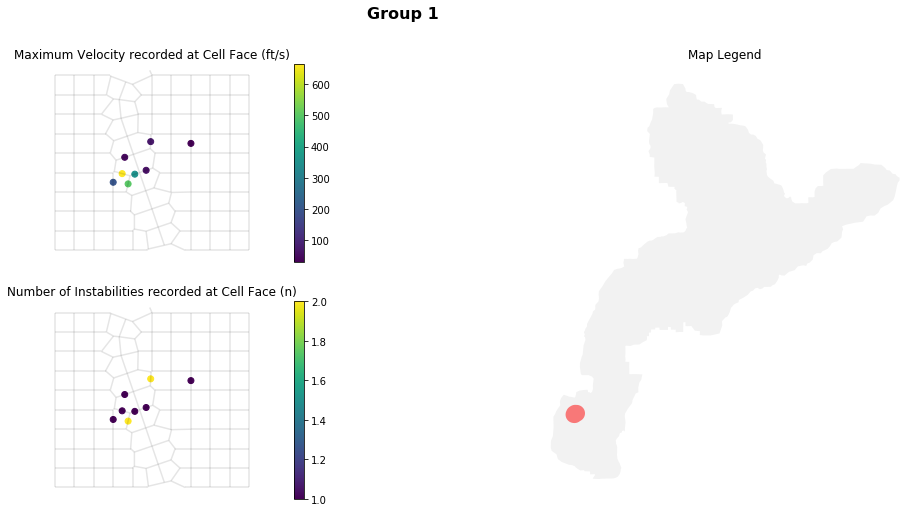

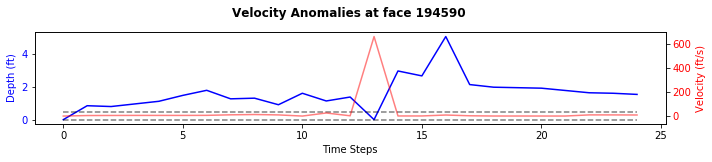

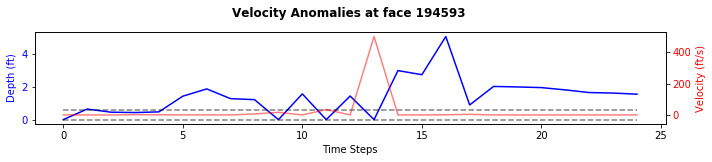

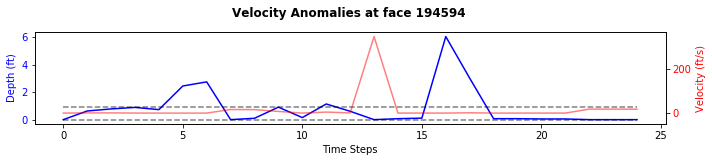

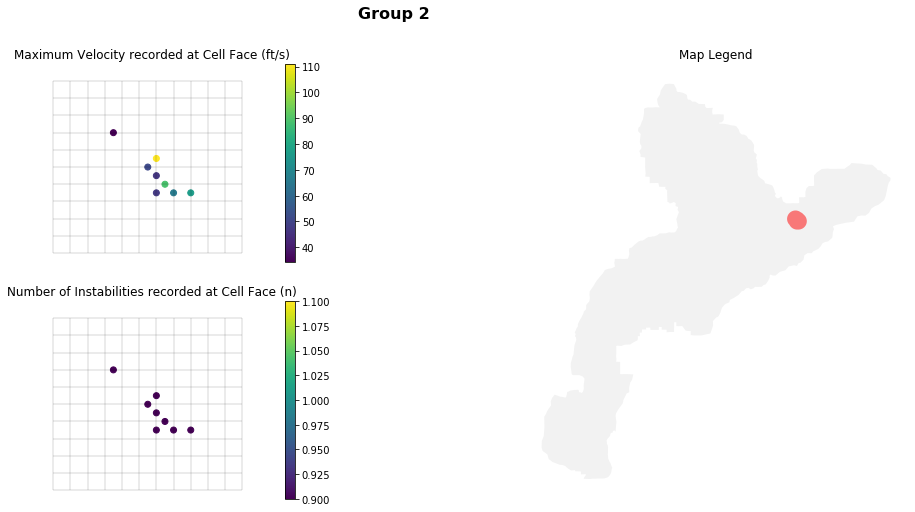

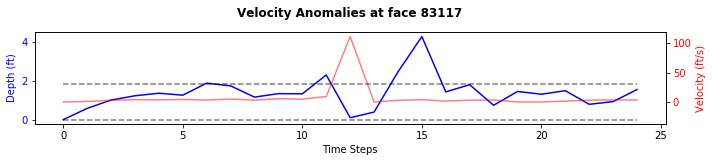

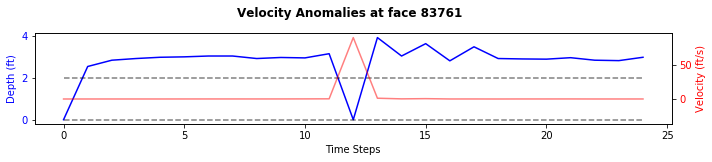

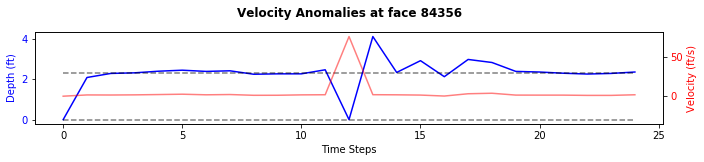

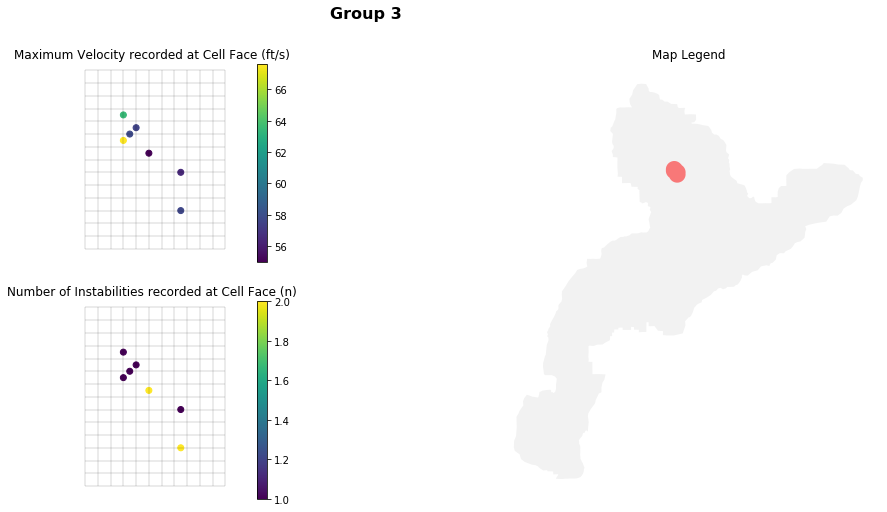

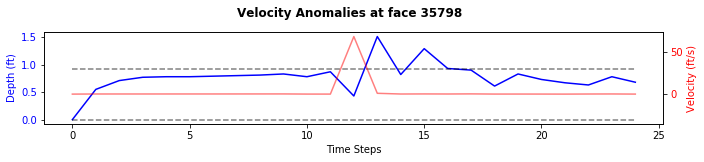

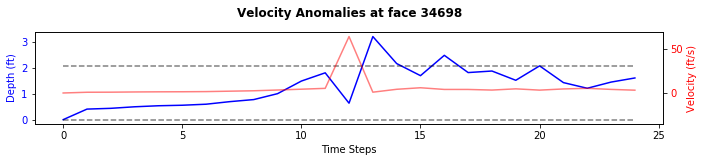

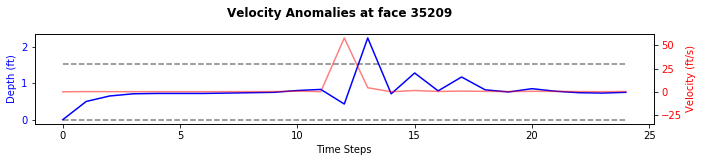

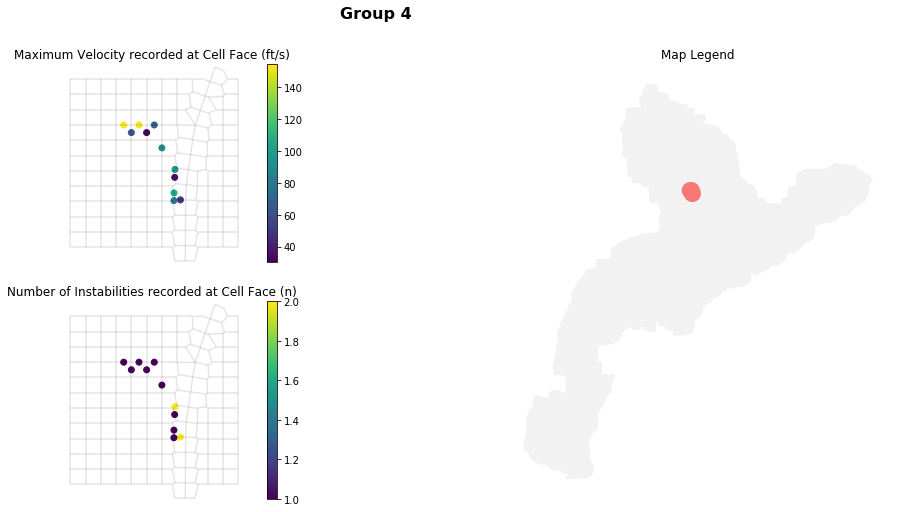

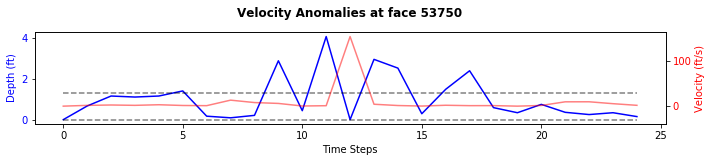

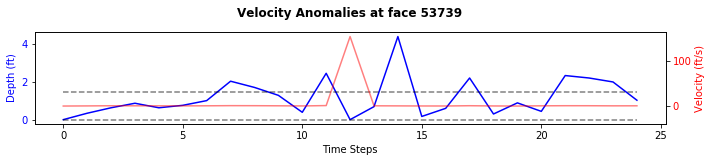

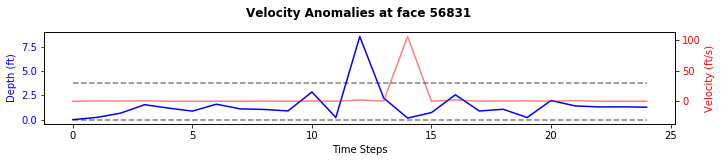

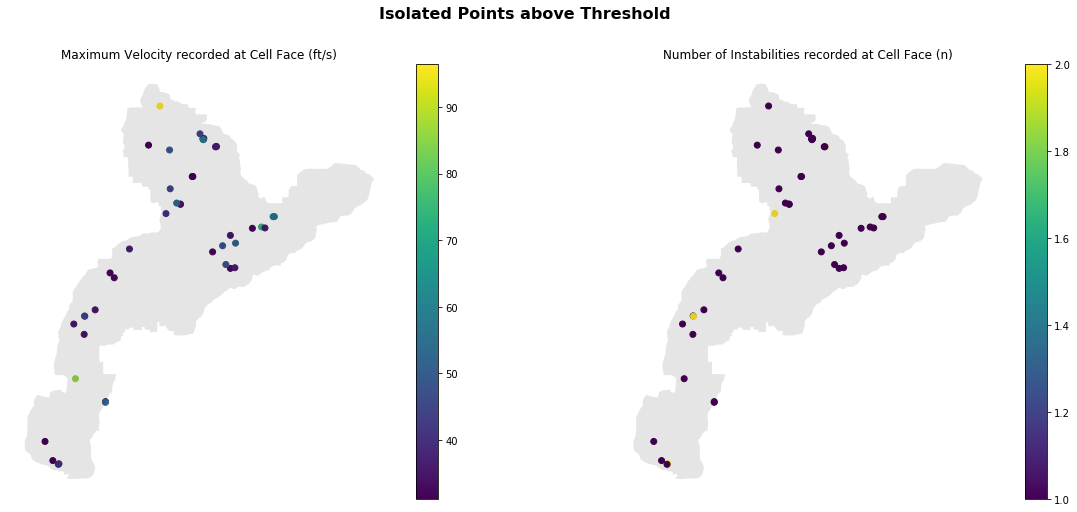

In [10]:
velCheckMain(results, plot_tseries=3)

# END